In [2]:
import os
os.path.join("a","b","c")

'a/b/c'

In [3]:
from numpy import mean, std, interp, linspace, minimum, maximum
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_ROC_curves(plt, y_true, y_scores, color='green', tag='vagueness'):
    tprs = []
    aucs = []
    mean_fpr = linspace(0, 1, 100)

    for i in range(y_scores.shape[1]):
        # y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        # auc_score = roc_auc_score(y_true, y_score)

        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        # plt.plot(fpr, tpr, color='green', linewidth=1, alpha=0.10, label=None)

    mean_tpr = mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = std(aucs)

    plt.plot(mean_fpr, mean_tpr, color=color,
                label=f"{tag} (AUC={mean_auc:.2f})",
                linewidth=2.0, alpha=0.80)
    # plt.plot(mean_fpr, mean_tpr, color=color,
    #             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
    #             linewidth=2.0, alpha=0.80)

    std_tpr = std(tprs, axis=0)
    tprs_upper = minimum(mean_tpr + std_tpr, 1)
    tprs_lower = maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color=color, alpha=0.2)
    # plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.33,
                        # label=r'$\pm$ 1 std. dev.')
    

In [4]:
import pickle
file_name = "/home/cxl173430/data/uncertainty_Related/HENN_Git_VScode/metrics.pkl"
# load data from pickle file
with open(file_name, 'rb') as f:
    data = pickle.load(f)

In [5]:
seeds = len(data)
num_metrics = len(data[0])
print("seeds: ", seeds)
print("num_metrics: ", num_metrics)

y_true = data[-1]

seeds:  6
num_metrics:  4


In [6]:
# generate each metric
import numpy as np

# vagueness, vacuity, dissononace, entropy
y_scores_1 = [seed[0] for seed in data[:-1]]
y_scores_1 = np.stack(y_scores_1, axis=1)

y_scores_2 = [seed[1] for seed in data[:-1]]
y_scores_2 = np.stack(y_scores_2, axis=1)

y_scores_3 = [seed[2] for seed in data[:-1]]
y_scores_3 = np.stack(y_scores_3, axis=1)

y_scores_4 = [seed[3] for seed in data[:-1]]
y_scores_4 = np.stack(y_scores_4, axis=1)


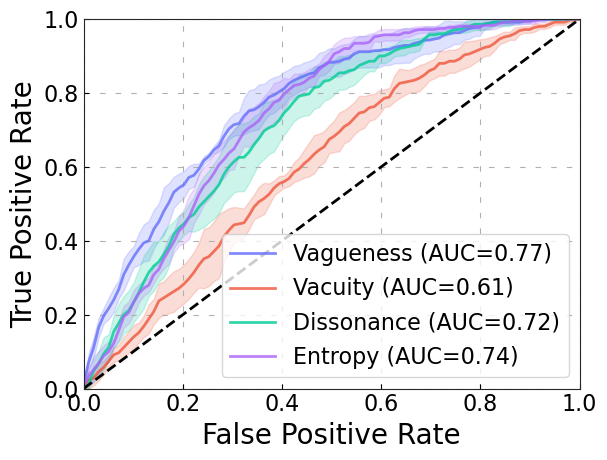

In [11]:
# plt.figure(figsize=(6, 6), dpi=80)
# plt.rcParams["figure.figsize"] = (8, 6)
plt.style.use('seaborn-deep')  
# plt.style.use("seaborn-v0_8-whitegrid")
# plt.style.use("seaborn-v0_8-deep")
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (5, 9)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.edgecolor'] = '0.15'

plot_ROC_curves(plt, y_true, y_scores_1, color='#636EFA', tag="Vagueness")
plot_ROC_curves(plt, y_true, y_scores_2, color='#EF553B', tag="Vacuity")
plot_ROC_curves(plt, y_true, y_scores_3, color='#00CC96', tag="Dissonance")
plot_ROC_curves(plt, y_true, y_scores_4, color='#AB63FA', tag="Entropy")

x = [0.0, 1.0]
plt.plot(x, x, linestyle='dashed', color='black', linewidth=2.0)

plt.legend(loc='lower right', fontsize=16, ncol=1)
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.tick_params(labelsize=16)

tag = 'auc'
data = 'cifar10'
plt.savefig(f"{data}_{tag}.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
import plotly.colors as pc

# Get the color "red" from Plotly
red = pc.get_color("red")

# Plot a line with the color "red"
plt.plot([1, 2, 3], [4, 5, 6], color=red)


AttributeError: module 'plotly.colors' has no attribute 'get_color'